# Chapter 2: The impact of hand washing at Vienna General

For additional context see chapter 2 of *The Virus of Variation*. Questions? Email us at QualityIsBroken@gmail.com

In [1]:
# Import libraries
from matplotlib import pyplot as plt
from process_improvement import comparison_charts as cc
import numpy as np
import seaborn as sns
import pandas as pd

%matplotlib inline

## Get the data

In [2]:
# Establish the dataset_url
dataset_url = r'https://raw.githubusercontent.com/jimlehner/the-virus-of-variation/refs/heads/main/data/vienna-general-death-to-birth-rates-by-clinic.csv'

# Get data function
def get_data(dataset_url) -> pd.DataFrame:
    return pd.read_csv(dataset_url)

# Get data
df = get_data(dataset_url)

# Specify 'Year' column as dtype string
df['Year'] = df['Year'].astype('string')

# Show df columns
df.columns

Index(['Hospital', 'Clinic', 'Employee', 'Year', 'Births', 'Deaths', 'Rate',
       'Note'],
      dtype='object')

## Drop unnecessary columns

In [3]:
df = df[[#'Hospital', 
         'Clinic',
         #'Employee',
         'Year',
         #'Births',
         #'Deaths',
         'Rate',
         #'Note'
        ]]

# Show df columns
df.columns

Index(['Clinic', 'Year', 'Rate'], dtype='object')

In [4]:
# Split dataframe according to clinic
first_clinic = df[df['Clinic'] == '1st Clinic']
second_clinic = df[df['Clinic'] == '2nd Clinic'].reset_index(drop=True)

# Specify labels column
labels = first_clinic['Year']

# Calculate the moving range
first_clinic = first_clinic.copy()
first_clinic['Moving Range'] = abs(first_clinic['Rate'].diff())

# Show first_clinic dataframe
first_clinic

,Clinic,Year,Rate,Moving Range
0,1st Clinic,1833,5.3,NaN
1,1st Clinic,1834,7.7,2.4
2,1st Clinic,1835,5.6,2.1
3,1st Clinic,1836,7.5,1.9
4,1st Clinic,1837,9.1,1.6
5,1st Clinic,1838,3.0,6.1
6,1st Clinic,1839,5.4,2.4
7,1st Clinic,1840,9.2,3.8
8,1st Clinic,1841,7.8,1.4
9,1st Clinic,1842,15.8,8.0


## Fig 2.2: Time series of death-to-birth ratios at Vienna General Hospital, 1833–1858

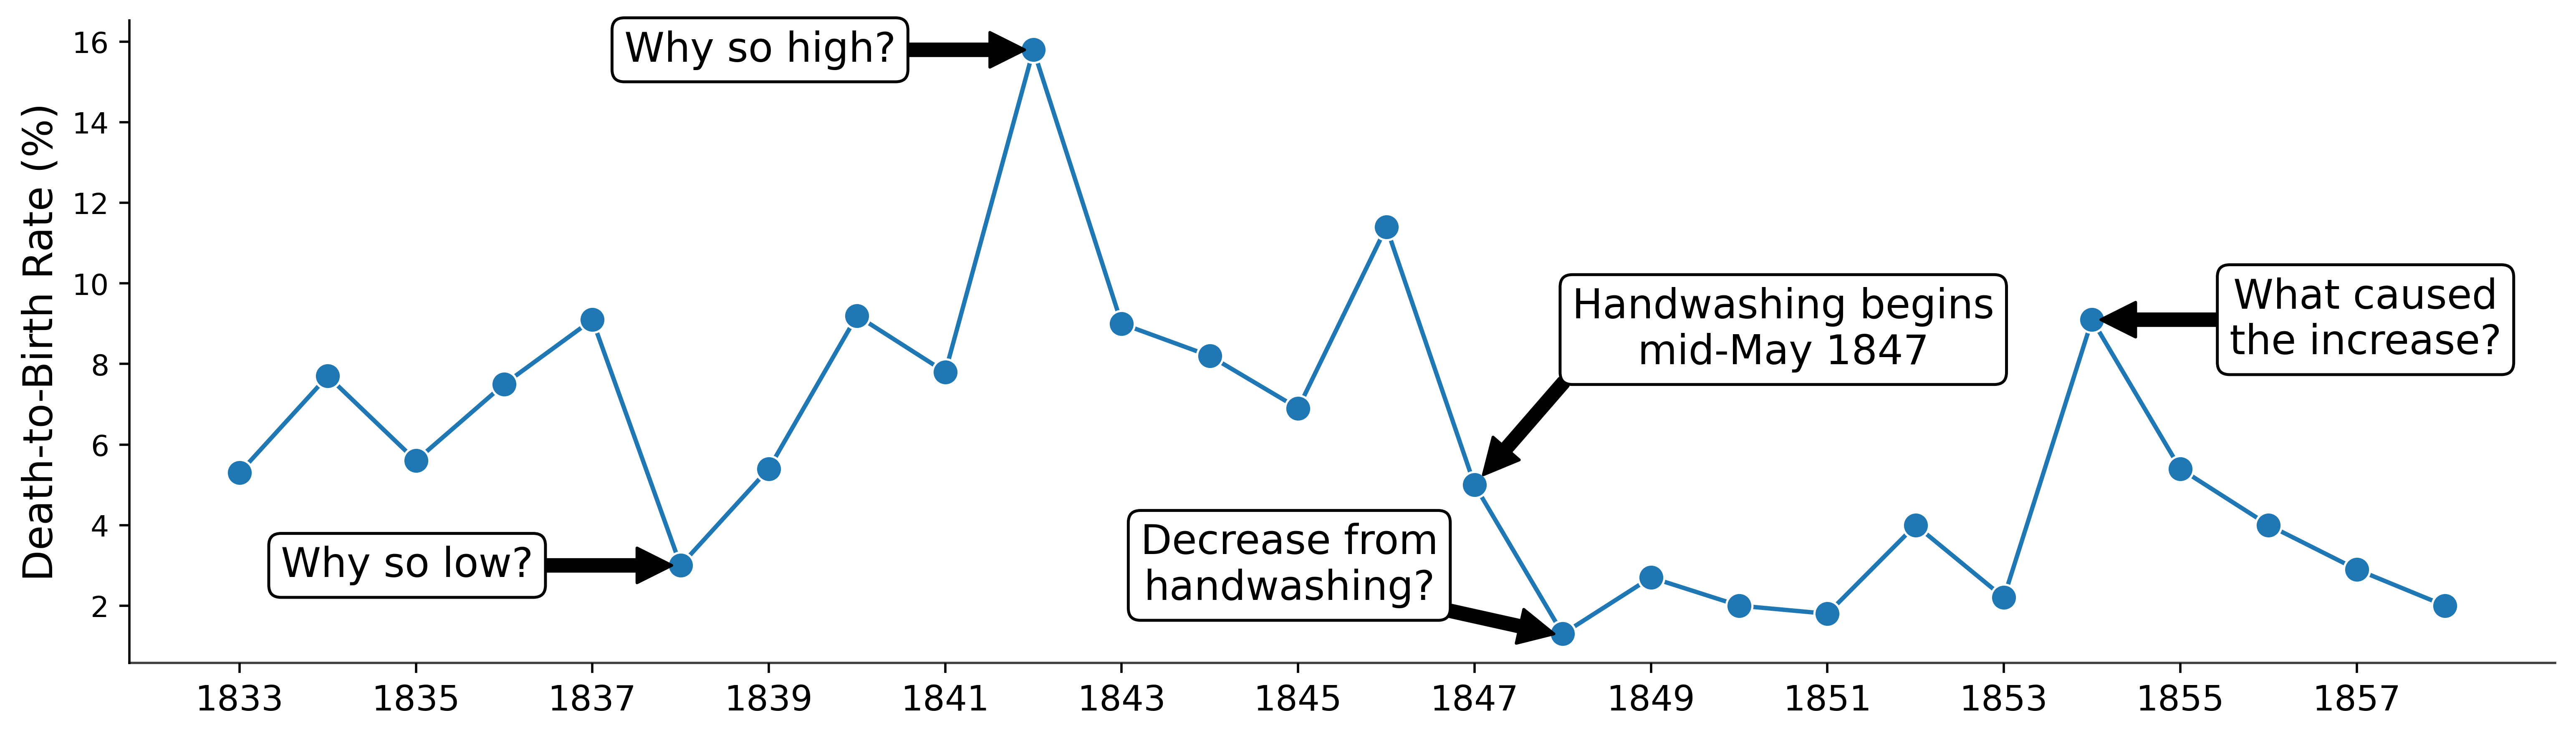

In [5]:
fig, ax = plt.subplots(figsize=(15,4), dpi=500)

sns.lineplot(data=first_clinic, 
             x='Year', 
             y='Rate',
             marker='o', 
             markersize=9)

# Y-label
ax.set_ylabel('Death-to-Birth Rate (%)', fontsize=14)

# X-Axis Formatting
tick_interval = 2
tick_positions = np.arange(0, len(first_clinic), tick_interval)
ax.set_xticks(tick_positions)
ax.set_xticklabels(labels.iloc[tick_positions], rotation=0, ha='center', 
                      fontsize=12)

# Despine
sns.despine()
ax.spines['bottom'].set_alpha(0.75)
# Remove xlabel
ax.set_xlabel('')

# Add annotation with arrow
plt.annotate('Why so low?', 
             xy=(4.9, 3.0), 
             xytext=(1.9,3.0), 
             color='black', 
             fontsize=14,
             ha='center',
             va='center',
             arrowprops=dict(facecolor='black'),
             bbox=dict(facecolor='white',boxstyle='round',edgecolor='black'))

plt.annotate('Why so high?', 
             xy=(8.9, 15.8), 
             xytext=(5.9, 15.8), 
             color='black', 
             fontsize=14,
             ha='center',
             va='center',
             arrowprops=dict(facecolor='black'),
             bbox=dict(facecolor='white',boxstyle='round',edgecolor='black'))

plt.annotate('Decrease from\nhandwashing?', 
             xy=(14.9, 1.3), 
             xytext=(11.9, 3), 
             color='black', 
             fontsize=14,
             ha='center',
             va='center',
             arrowprops=dict(facecolor='black'),
             bbox=dict(facecolor='white',boxstyle='round',edgecolor='black'))

plt.annotate('Handwashing begins\nmid-May 1847', 
             xy=(14.1,5.25), 
             xytext=(17.5,8), 
             color='black', 
             fontsize=14,
             ha='center',
             arrowprops=dict(facecolor='black'),
             bbox=dict(facecolor='white',boxstyle='round',edgecolor='black'))

plt.annotate('What caused\nthe increase?', 
             xy=(21.1, 9.1), 
             xytext=(24.1, 9.1), 
             color='black', 
             fontsize=14,
             ha='center',
             va='center',
             arrowprops=dict(facecolor='black'),
             bbox=dict(facecolor='white',boxstyle='round',edgecolor='black'))

# Show plot
plt.show()

## Fig 2.3: Time series of death-to-birth rates at Vienna General Hospital with the associated mean, 1833–1858

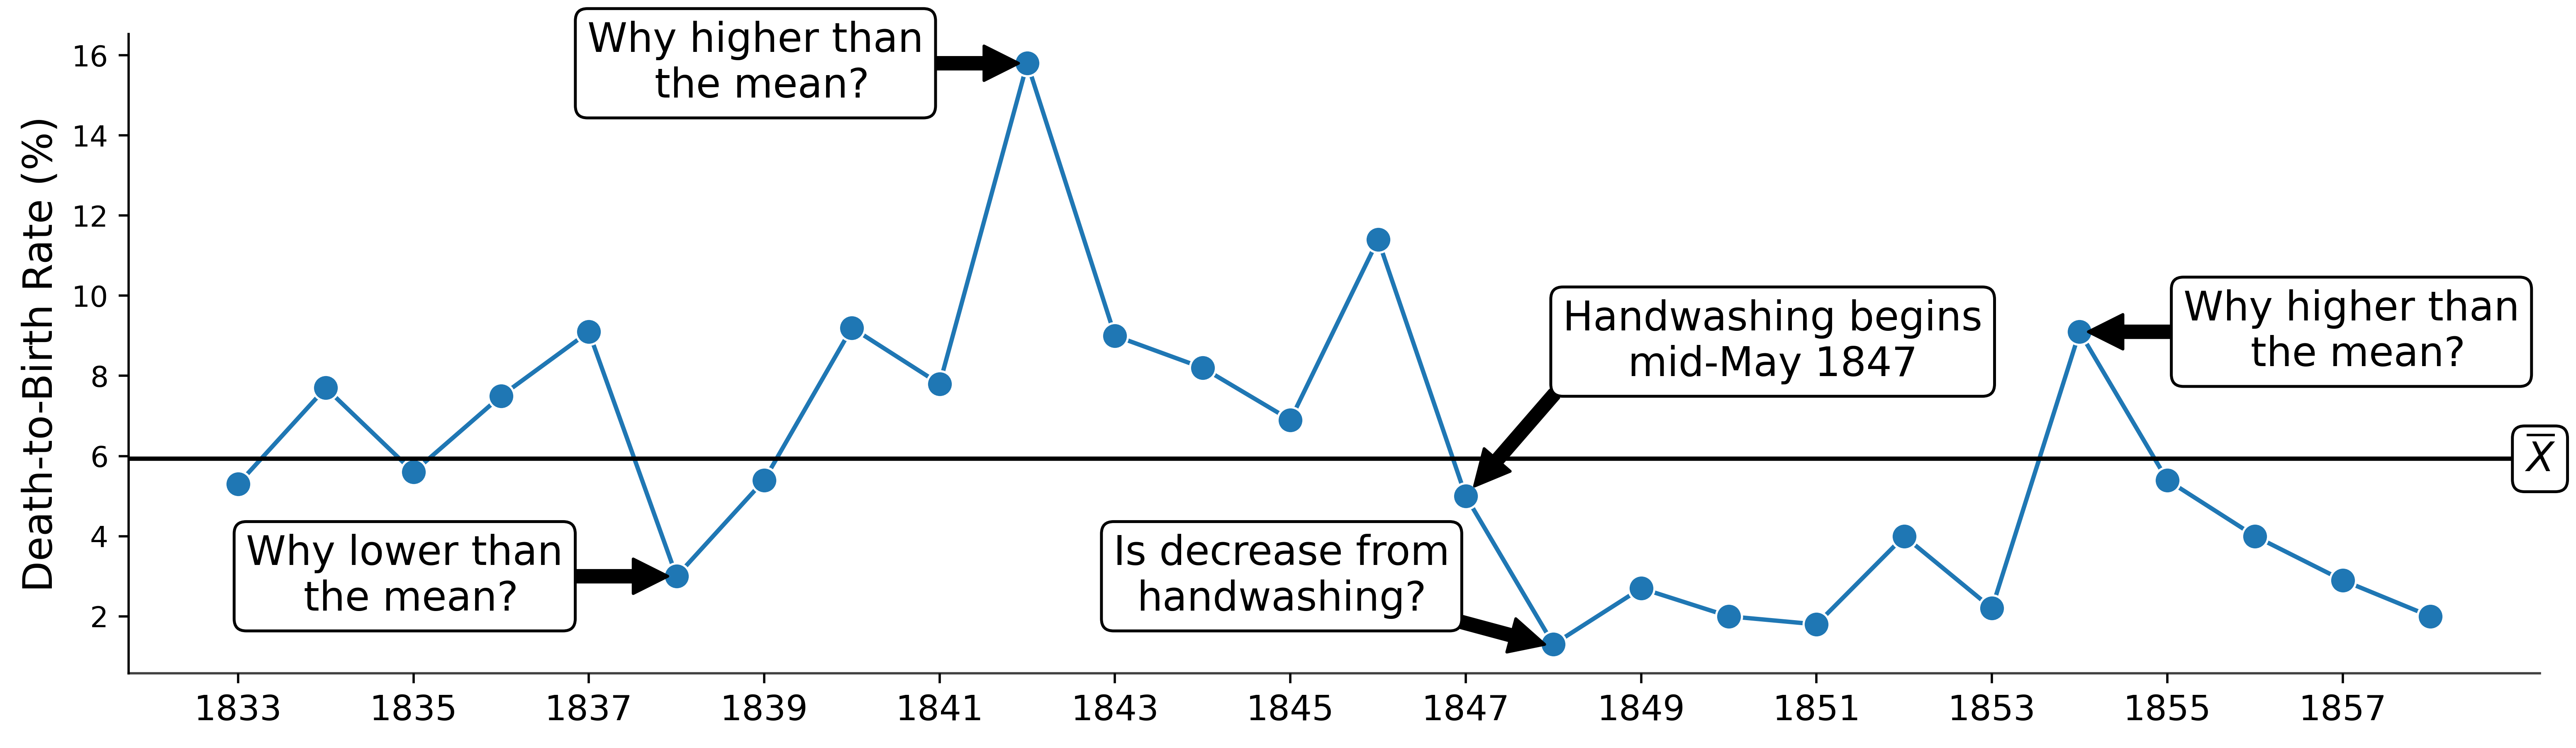

In [6]:
# Calculate the mean of the first clinic ratios
first_clinic_mean = round(first_clinic['Rate'].mean(),2)

# Create figure and axis
fig, ax = plt.subplots(figsize=(15,4), dpi=500)

# Plot data in line plot
sns.lineplot(data=first_clinic, 
             x='Year', 
             y='Rate',
             marker='o', 
             markersize=9)

# Show mean 
ax.axhline(first_clinic_mean, ls='-',c='black')

# bbox properties 
bbox_props_centerline = dict(boxstyle="round,pad=0.3", fc="white", ec="black", lw=1)
# Add mean label
ax.text(ax.get_xlim()[1], first_clinic_mean, 
#         mean,
        r'$\overline{X}$', 
        color='black', ha='center', va='center', 
        fontsize=14, bbox=bbox_props_centerline)

# Set spine parameters
ax.spines[['top','right']].set_visible(False)
ax.spines['bottom'].set_alpha(0.75)
# Remove xlabel
ax.set_xlabel('')

# Y-label
ax.set_ylabel('Death-to-Birth Rate (%)', fontsize=14)

# X-Axis Formatting
tick_interval = 2
tick_positions = np.arange(0, len(first_clinic), tick_interval)
ax.set_xticks(tick_positions)
ax.set_xticklabels(labels.iloc[tick_positions], rotation=0, ha='center', 
                      fontsize=12)

# Add annotation with arrow
plt.annotate('Why lower than\n the mean?', 
             xy=(4.9, 3.0), 
             xytext=(1.9,3.0), 
             color='black', 
             fontsize=14,
             ha='center',
             va='center',
             arrowprops=dict(facecolor='black'),
             bbox=dict(facecolor='white',boxstyle='round',edgecolor='black'))

plt.annotate('Why higher than\n the mean?', 
             xy=(8.9, 15.8), 
             xytext=(5.9, 15.8), 
             color='black', 
             fontsize=14,
             ha='center',
             va='center',
             arrowprops=dict(facecolor='black'),
             bbox=dict(facecolor='white',boxstyle='round',edgecolor='black'))

plt.annotate('Is decrease from\nhandwashing?', 
             xy=(14.9, 1.3), 
             xytext=(11.9, 3), 
             color='black', 
             fontsize=14,
             ha='center',
             va='center',
             arrowprops=dict(facecolor='black'),
             bbox=dict(facecolor='white',boxstyle='round',edgecolor='black'))

plt.annotate('Handwashing begins\nmid-May 1847', 
             xy=(14.1,5.25), 
             xytext=(17.5,8), 
             color='black', 
             fontsize=14,
             ha='center',
             arrowprops=dict(facecolor='black'),
             bbox=dict(facecolor='white',boxstyle='round',edgecolor='black'))

plt.annotate('Why higher than\n the mean?', 
             xy=(21.1, 9.1), 
             xytext=(24.1, 9.1), 
             color='black', 
             fontsize=14,
             ha='center',
             va='center',
             arrowprops=dict(facecolor='black'),
             bbox=dict(facecolor='white',boxstyle='round',edgecolor='black'))

# Show plot
plt.show()

## Fig 2.4: XmR chart of death-to-birth rates at Vienna General Hospital, 1833–1858

### Calculate the process statistics

In [15]:
# Specify round_value
round_value = 2

# Average moving range
ave_mR = round(first_clinic['Moving Range'].mean(), round_value)

# Mean
mean = round(first_clinic['Rate'].mean(), round_value)

# Upper Process Limit (UPL)
UPL = round(mean + (2.660*ave_mR), round_value)

# Lower Process Limit (LPL)
LPL_calc = round(mean - (2.660*ave_mR), round_value)

# In instances where a negative LPL does not make sense the max function 
# is used to return the greater of the two arguemnts.
LPL = max(0, LPL_calc)

# Upper Range Limit (URL)
URL = round(3.268*ave_mR, round_value)

# Print process statistics
print('Ave. mR:', ave_mR)
print('Mean:', mean)
print('UPL:', UPL)
print('LPL (calculated):', LPL_calc)
print('LPL (actual):', LPL)
print('URL:', URL)

Ave. mR: 2.94
Mean: 5.93
UPL: 13.75
LPL (calculated): -1.89
LPL (actual): 0
URL: 9.61


### Generate XmR comparison figure

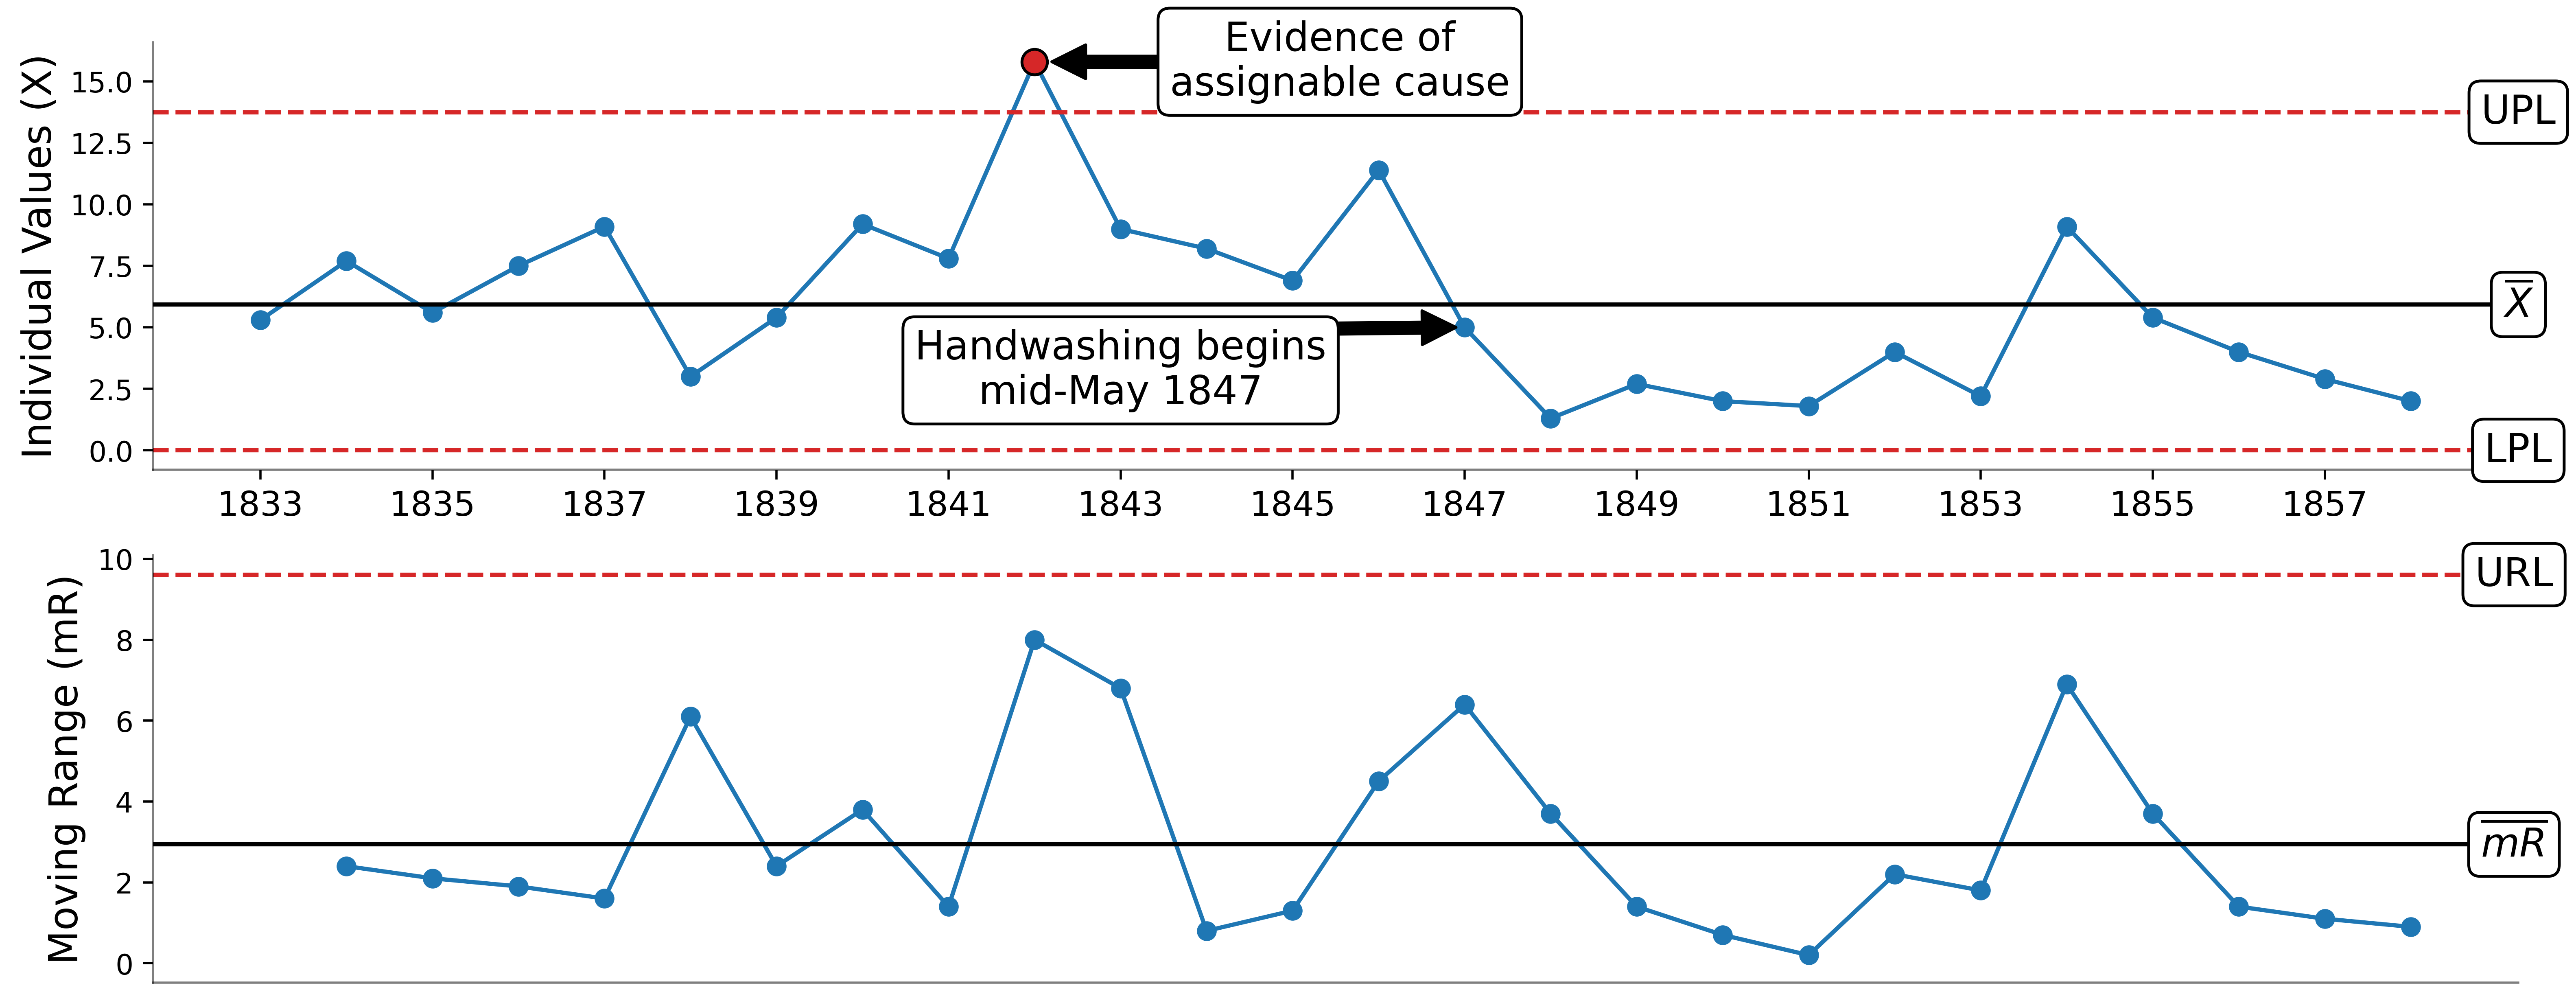

In [8]:
# Specify tickinterval
tickinterval = 2

# Specify data and labels
data = first_clinic['Rate']
labels = first_clinic['Year']
moving_ranges = first_clinic['Moving Range']

# Create masking parameters for values greater than and less than the process limits on X-chart
upper_lim = np.ma.masked_where(data < UPL, data)
lower_lim = np.ma.masked_where(data > LPL, data)
# Create masking parameters for values greater than URL on mR-chart
url_greater = np.ma.masked_where(moving_ranges <= URL, moving_ranges)
url_less = np.ma.masked_where(moving_ranges > URL, moving_ranges)

# Create list of tuples that specify value and color for mean, AmR, UPL, LPL, and URL
xchart_lines = [(mean,'-','black'), (UPL,'--','tab:red'), (LPL,'--','tab:red')]
mrchart_lines = [(ave_mR,'-','black'), (URL,'--','tab:red')]

# Create list of tuples with y-coordinate and labels for x-chart process limits and centerline 
xchart_labels = [(UPL,UPL),(LPL,LPL),(mean,mean)]
# Create list of tuples with y-coordinate and labels for mR-chart process limit and centerline
mrchart_labels = [(URL,URL),(ave_mR, ave_mR)]

# Create figure and axis
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(15,6), dpi=500)

# Plot data 
axs[0].plot(labels, data, marker='o')

# Plot moving ranges
axs[1].plot(labels, moving_ranges, marker='o')

# Add masking parameters to color values outside process limits
axs[0].plot(labels, lower_lim, marker='o', ls='none', color='tab:red',
        markeredgecolor='black', markersize=9)
axs[0].plot(labels, upper_lim, marker='o', ls='none', color='tab:red',
        markeredgecolor='black', markersize=9)
# Add masking parameters to color values greater than URL
axs[1].plot(labels, url_greater, marker='o', ls='none', color='tab:red',
        markeredgecolor='black', markersize=9)

# Add text labels for limits and centerline
bbox_props = dict(boxstyle="round,pad=0.3", fc="white", ec="black", lw=1)
axs[0].text(axs[0].get_xlim()[1], UPL, 'UPL', color='black', ha='center', va='center', 
            fontsize=14, bbox=bbox_props)
axs[0].text(axs[0].get_xlim()[1], LPL, 'LPL', color='black', ha='center', va='center',
            fontsize=14, bbox=bbox_props)
axs[0].text(axs[0].get_xlim()[1], mean, r'$\overline{X}$', color='black', ha='center', va='center',
            fontsize=14, bbox=bbox_props)

axs[1].text(axs[1].get_xlim()[1], URL, 'URL', color='black', ha='center', va='center',
            fontsize=14, bbox=bbox_props)
axs[1].text(axs[1].get_xlim()[1], ave_mR, r'$\overline{mR}$', color='black', ha='center', va='center',
            fontsize=14, bbox=bbox_props)

# Add centerline and process limits 
for value, line, color in xchart_lines:
    axs[0].axhline(value, ls=line, c=color)
    
# Add centerline and process limits 
for value, line, color in mrchart_lines:
    axs[1].axhline(value, ls=line, c=color)

# Set the x-tick labels with increased intervals
tick_interval = tickinterval  # Increase this value to increase the spacing between ticks
tick_positions = np.arange(0, len(labels), tick_interval)
axs[0].set_xticks(tick_positions)
axs[0].set_xticklabels(labels.iloc[tick_positions], rotation=0, ha='center', fontsize=12)
# Remove ticks on axs[1]
axs[1].set_xticks([])

# Color values in the moving range white (applies to first value for visual offset)
for xi, yi in zip(labels, moving_ranges):
    if np.isnan(yi):
        plt.plot(xi, 0, marker='x', color='white', markersize=0) 

annotations = [ 
    ('Handwashing begins\nmid-May 1847', (13.9,5), (10, 3.25)), 
    ('Evidence of\nassignable cause', (9.2,15.8), (12.55, 15.8))
]

# Add annotations using a loop
for text, xy, xytext in annotations:
    axs[0].annotate(text, xy=xy, xytext=xytext,
                ha='center', va='center', fontsize=14,
                bbox=dict(facecolor='white', edgecolor='black', boxstyle='round'),
                arrowprops=dict(facecolor='black'))

# Specify axis labels and title
axs[0].set_xlabel("",fontsize=12)
axs[0].set_ylabel("Individual Values (X)", fontsize=14)
axs[0].set_title("", fontsize=14)

axs[1].set_xlabel("")
axs[1].set_ylabel("Moving Range (mR)", fontsize=14)

# Specify spine visibility 
sns.despine()
for val in (0,1):
    axs[val].spines[['left','bottom']].set_alpha(0.5)

# Show plot
plt.show()

## Fig 2.5: XmR chart of death-to-birth rates at Vienna General Hospital, 1833–1858

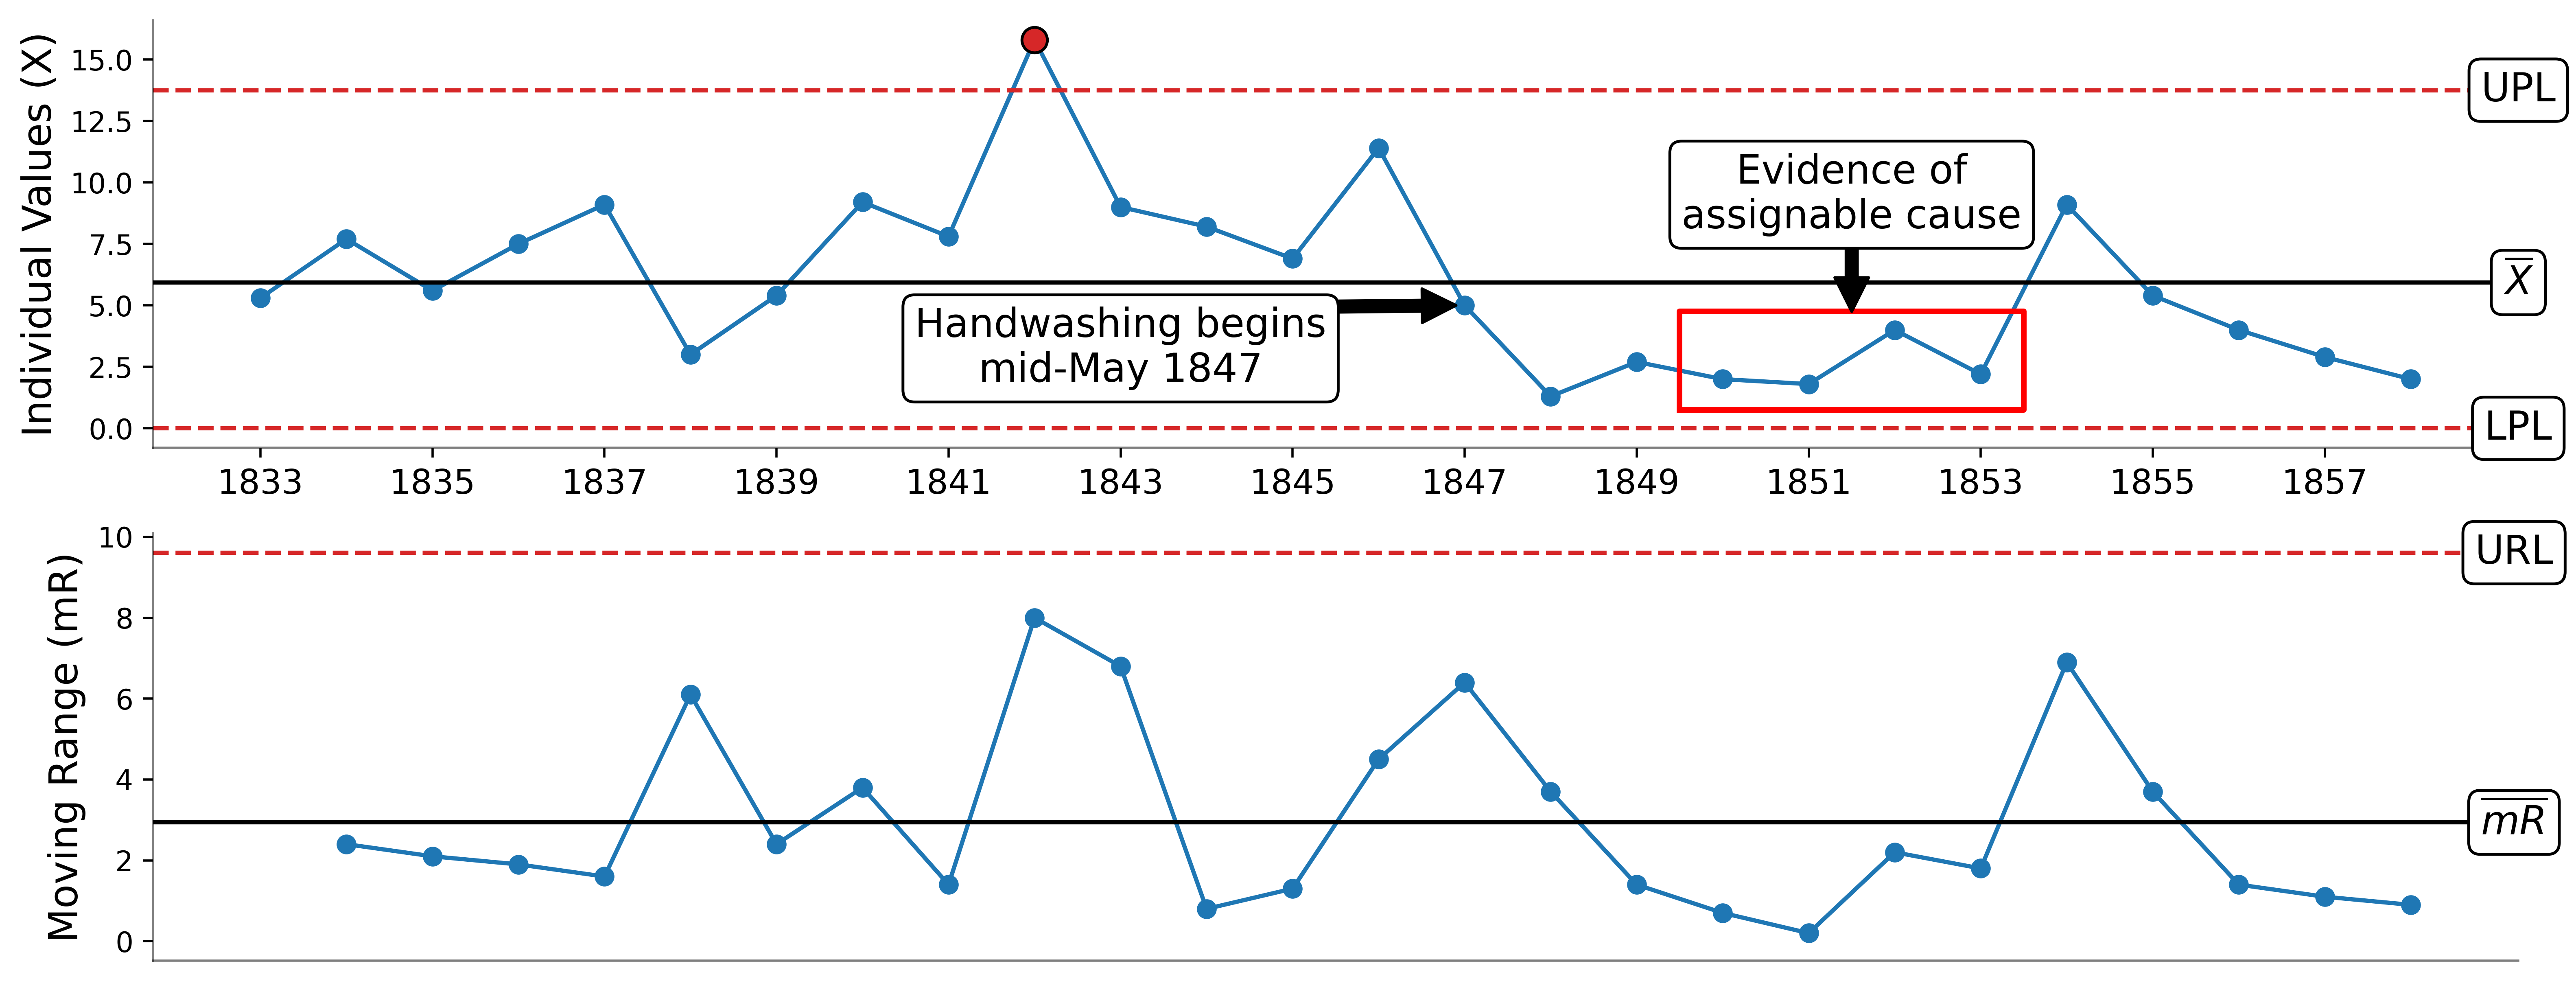

In [9]:
# Specify tickinterval
tickinterval = 2

# Create masking parameters for values greater than and less than the process limits on X-chart
upper_lim = np.ma.masked_where(data < UPL, data)
lower_lim = np.ma.masked_where(data > LPL, data)
# Create masking parameters for values greater than URL on mR-chart
url_greater = np.ma.masked_where(moving_ranges <= URL, moving_ranges)
url_less = np.ma.masked_where(moving_ranges > URL, moving_ranges)

# Create list of tuples that specify value and color for mean, AmR, UPL, LPL, and URL
xchart_lines = [(mean,'-','black'), (UPL,'--','tab:red'), (LPL,'--','tab:red')]
mrchart_lines = [(ave_mR,'-','black'), (URL,'--','tab:red')]

# Create list of tuples with y-coordinate and labels for x-chart process limits and centerline 
xchart_labels = [(UPL,UPL),(LPL,LPL),(mean,mean)]
# Create list of tuples with y-coordinate and labels for mR-chart process limit and centerline
mrchart_labels = [(URL,URL),(ave_mR, ave_mR)]

# Create figure and axis
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(15,6), dpi=500)

# Plot data 
axs[0].plot(labels, data, marker='o')

# Plot moving ranges
axs[1].plot(labels, moving_ranges, marker='o')

# Add masking parameters to color values outside process limits
axs[0].plot(labels, lower_lim, marker='o', ls='none', color='tab:red',
        markeredgecolor='black', markersize=9)
axs[0].plot(labels, upper_lim, marker='o', ls='none', color='tab:red',
        markeredgecolor='black', markersize=9)
# Add masking parameters to color values greater than URL
axs[1].plot(labels, url_greater, marker='o', ls='none', color='tab:red',
        markeredgecolor='black', markersize=9)

# Add text labels for limits and centerline
bbox_props = dict(boxstyle="round,pad=0.3", fc="white", ec="black", lw=1)
axs[0].text(axs[0].get_xlim()[1], UPL, 'UPL', color='black', ha='center', va='center', 
            fontsize=14, bbox=bbox_props)
axs[0].text(axs[0].get_xlim()[1], LPL, 'LPL', color='black', ha='center', va='center',
            fontsize=14, bbox=bbox_props)
axs[0].text(axs[0].get_xlim()[1], mean, r'$\overline{X}$', color='black', ha='center', va='center',
            fontsize=14, bbox=bbox_props)

axs[1].text(axs[1].get_xlim()[1], URL, 'URL', color='black', ha='center', va='center',
            fontsize=14, bbox=bbox_props)
axs[1].text(axs[1].get_xlim()[1], ave_mR, r'$\overline{mR}$', color='black', ha='center', va='center',
            fontsize=14, bbox=bbox_props)

# Add centerline and process limits 
for value, line, color in xchart_lines:
    axs[0].axhline(value, ls=line, c=color)
    
# Add centerline and process limits 
for value, line, color in mrchart_lines:
    axs[1].axhline(value, ls=line, c=color)

# Set the x-tick labels with increased intervals
tick_interval = tickinterval  # Increase this value to increase the spacing between ticks
tick_positions = np.arange(0, len(labels), tick_interval)
axs[0].set_xticks(tick_positions)
axs[0].set_xticklabels(labels.iloc[tick_positions], rotation=0, ha='center', fontsize=12)
# Remove ticks on axs[1]
axs[1].set_xticks([])

# Color values in the moving range white (applies to first value for visual offset)
for xi, yi in zip(labels, moving_ranges):
    if np.isnan(yi):
        plt.plot(xi, 0, marker='x', color='white', markersize=0) 

# Add box for highlighting range of values satisfying Rule 3
start_index = 16.5
end_index = 20.5  
y_min = 0.75  
y_max = 4.75    

# Add a border using plt.plot()
axs[0].plot([start_index, end_index, end_index, start_index, start_index], 
         [y_min, y_min, y_max, y_max, y_min], color='red', linewidth=2)

annotations = [ 
    ('Handwashing begins\nmid-May 1847', (13.9,5), (10, 3.25)), 
    ('Evidence of\nassignable cause', (18.5, 4.75), (18.5, 9.5)),
#     ('Evidence of\nassignable cause', (9.2,15.8), (12.55, 15.8))
]

# Add annotations using a loop
for text, xy, xytext in annotations:
    axs[0].annotate(text, xy=xy, xytext=xytext,
                ha='center', va='center', fontsize=14,
                bbox=dict(facecolor='white', edgecolor='black', boxstyle='round'),
                arrowprops=dict(facecolor='black'))

# Specify axis labels and title
axs[0].set_xlabel("",fontsize=12)
axs[0].set_ylabel("Individual Values (X)", fontsize=14)
axs[0].set_title("", fontsize=14)

axs[1].set_xlabel("")
axs[1].set_ylabel("Moving Range (mR)", fontsize=14)

# Specify spine visibility 
sns.despine()
for val in (0,1):
    axs[val].spines[['left','bottom']].set_alpha(0.5)

# Show plot
plt.show()

## Fig 2.6: Comparison of death-to-birth rates before and after handwashing, using XmR charts

In [10]:
# Split first clinic into 'Before' and 'After' hand washing
before_washing = first_clinic[:14]
after_washing = first_clinic[14:].reset_index(drop=True)

# Create dataframe list
df_list = [before_washing, after_washing]

# Create label list
label_list = ['Before handwashing', 'After handwashing']

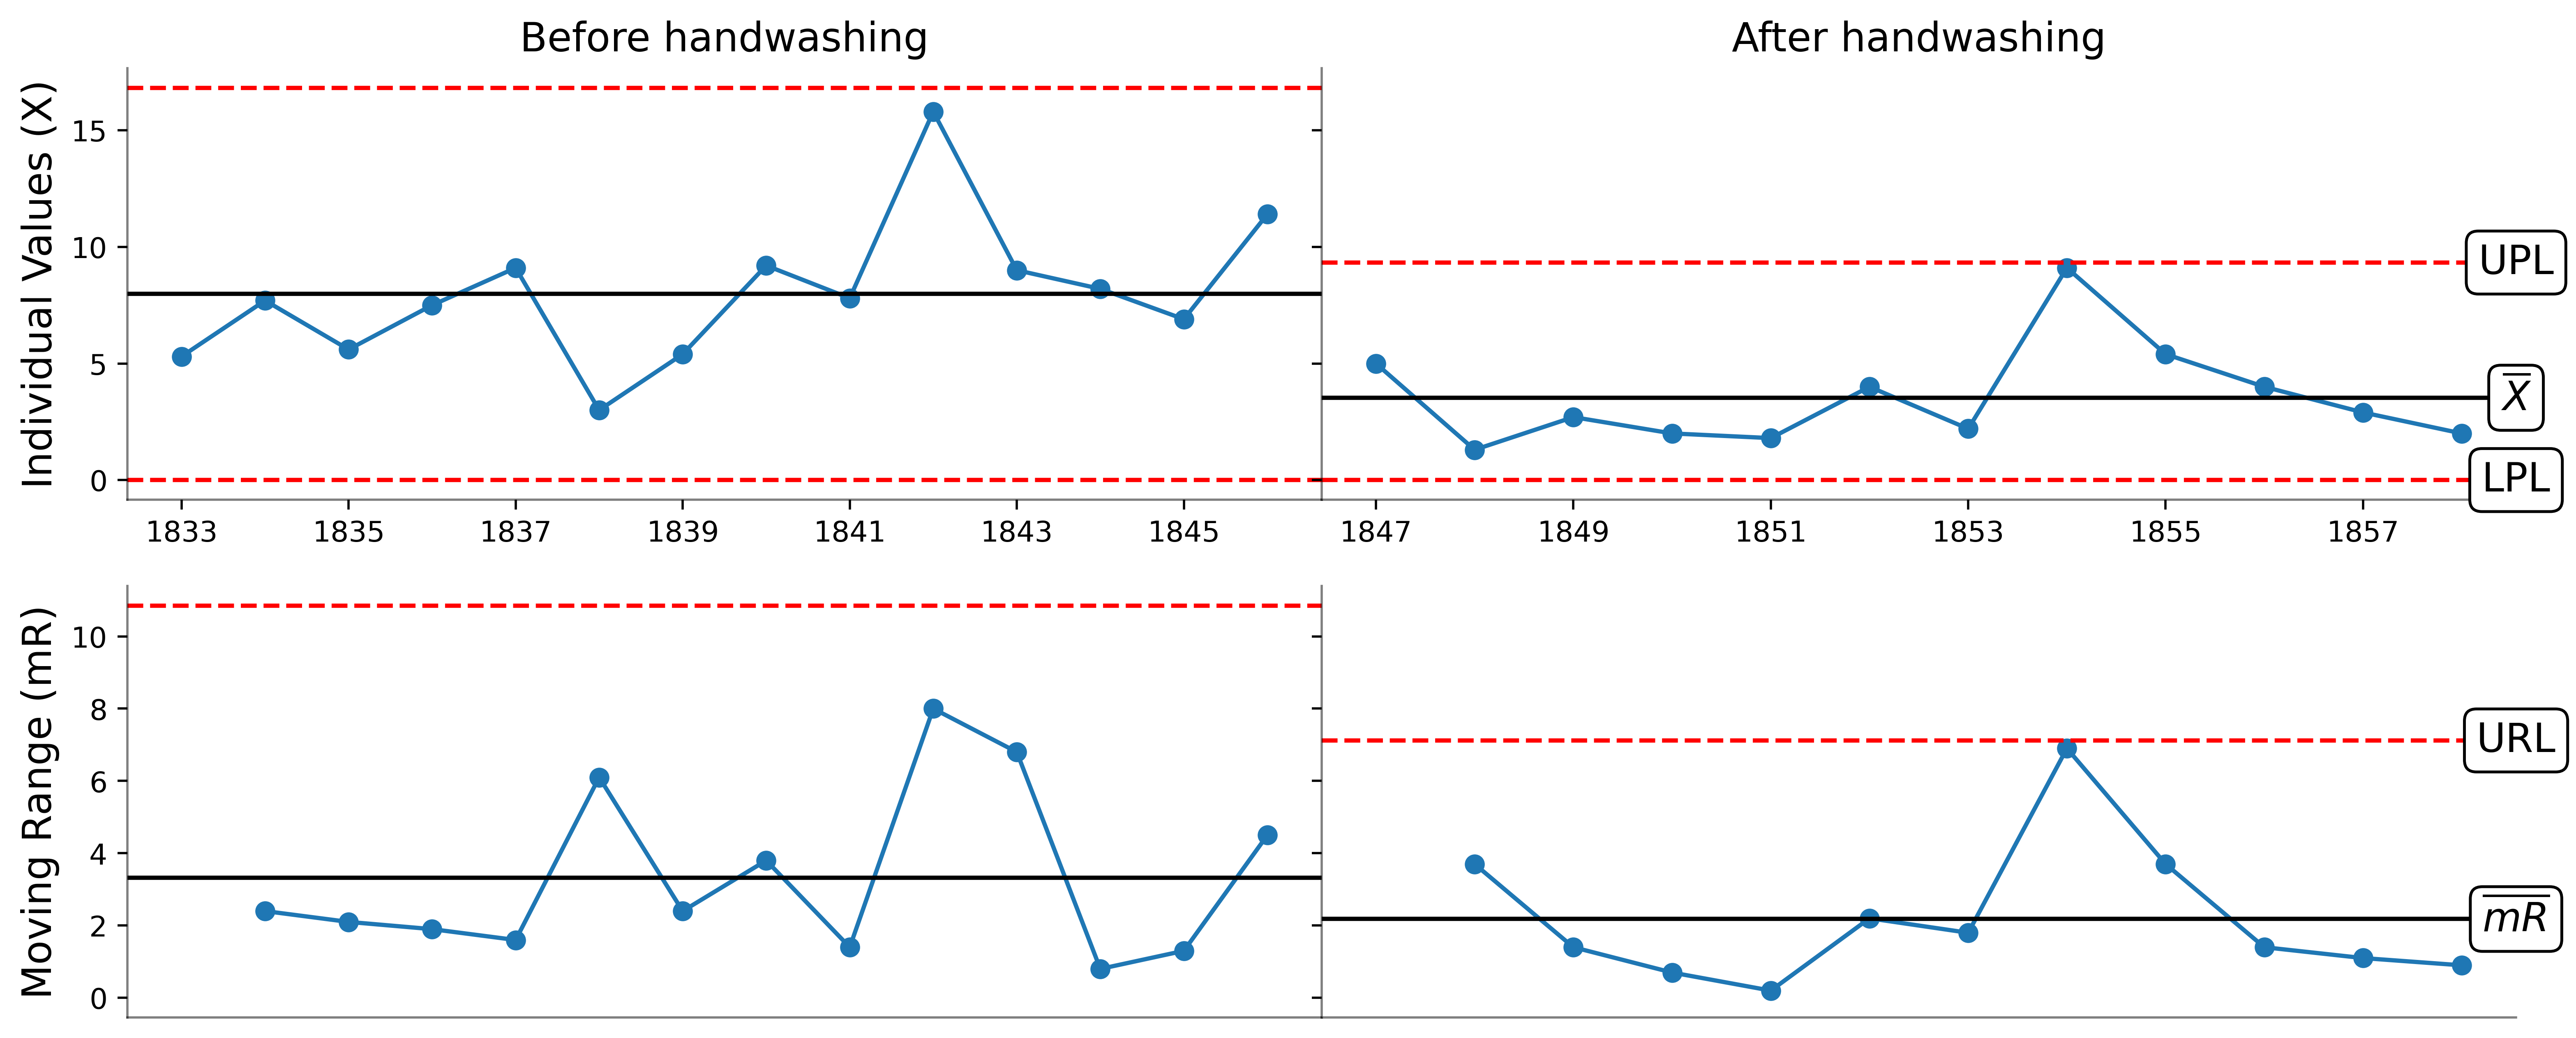

In [11]:
# This comparison uses the process_improvement.py libraray function comparison_chart.xmr_comparison.
# The library can be installed with pip install process_improvement.
comparison_results = cc.xmr_comparison(df_list, 'Rate', 'Year', label_list, tickinterval=2, dpi=600)

In [12]:
comparison_results

,Label,Mean,Ave. mR,UPL,LPL,URL,PLR,Characterization
0,Before handwashing,7.99,3.32,16.8212,0,10.85,16.8212,Predictable
1,After handwashing,3.53,2.18,9.3288,0,7.12,9.3288,Predictable
